<a href="https://colab.research.google.com/github/Onethybeing/pytorch_implementation/blob/main/faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import functional as F

In [ ]:
!pip install --upgrade torchvision

In [ ]:
def load_model():
  weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
  model =fasterrcnn_resnet50_fpn_v2(weights = weights,box_score_threh=0.7)
  model.eval()
  return model,weights.meta["categories"]

In [ ]:
def preprocess_image(image_path):
  image = Image.open(image_path)
  image = image.convert("RGB")
  image_tensor =F.to_tensor(image)
  return image,image_tensor

## **model predictions**


In [ ]:
def perform_detection(model,image_tensor):
  with torch.no_grad():
    prediction = model([image_tensor])
    print("model Output")
    print(prediction)
    return prediction[0] #return the first (and only) prediction

###class labels ,confidence scores and bounding  box coordinates

In [ ]:
def visualize_detection(image,predictions,category_names):
  #convert PIL image to numpy array for opencv
  image_np = np.array(image)
  image_np = cv2.cvtColor(image_np,cv2.COLOR_RGB2BGR)

  #predictions component
  boxes = predictions['boxes'].cpu().numpy().astype(np.int32)
  scores = predictions['scores'].cpu().numpy()
  labels = predictions['labels'].cpu().numpy()

  #make a copy to draw a box
  image_with_boxes = image_np.copy()
  #color map fordifferent classes
  color_map = {}
  #draw each bounding boxes
  for box,score,label in zip(boxes,scores,labels):
    #only show detections with scores>threshold(already filtered by model)
    if label not in color_map:
      color_map[label] =(
          np.random.randint(0,255),
          np.random.randint(0,255),
          np.random.randint(0,255)
      )
    color = color_map[label]
    #draw the rectangle
    cv2.rectangle(
        image_with_boxes,
        (box[0],box[1]),
        (box[2],box[3]),
        color,
        2
    )

     #create label text
    label_text = f"{category_names[label]}: {score:.2f}"
    text_size,baseline = cv2.getTextSize(label_text,cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.5,1)
    cv2.rectangle(
        image_with_boxes,
        (box[0],box[1]-text_size[1]-5),
        (box[0]+text_size[0],box[1]),
        color,
        -1
    )
    cv2.putText(
    image_with_boxes,
    label_text,
    (box[0],box[1]-text_size[1]-1),
    cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
    0.5,
    (255,255,255),
    1,
    cv2.LINE_AA
    )
  image_with_boxes = cv2.cvtColor(image_with_boxes,cv2.COLOR_BGR2RGB)
  return image_with_boxes



In [ ]:
def main(image_path):
  #main_function to run object detection and visualisation
  #load model categories
  model,categories = load_model()
  print(f"Model loaded with {len(categories)}categories")
  image,image_tensor = preprocess_image(image_path)
  predictions = perform_detection(model,image_tensor)
  num_detections =len(predictions['boxes'])
  print(f"detected{num_detections}")
  result_image = visualize_detection(image,predictions,categories)
  plt.figure(figsize=(12,8))
  plt.imshow(result_image)
  plt.axis('off')
  plt.tight_layout()
  plt.show()


In [ ]:
def main_colab(frame):
    model, categories = load_model()
    print(f"Model loaded with {len(categories)} categories")
    if frame is not None:
        frame_tensor = F.to_tensor(frame)
        predictions = perform_detection(model, frame_tensor)
        num_detections = len(predictions['boxes'])
        print(f"detected{num_detections}")
        result_frame = visualize_detection(frame, predictions, categories)
        cv2_imshow(result_frame)
    else:
        print("No camera found or frame could not be captured.")


Model loaded with 91categories
model Output
[{'boxes': tensor([[4.3351e+02, 3.0779e+01, 1.2763e+03, 7.1281e+02],
        [0.0000e+00, 3.9695e+02, 4.3994e+02, 7.0430e+02],
        [4.2393e+02, 5.9734e+02, 4.8945e+02, 6.7743e+02],
        [3.1141e+02, 1.6608e+02, 6.5114e+02, 5.9329e+02],
        [0.0000e+00, 3.9466e+02, 2.6622e+02, 5.7761e+02],
        [4.1964e-01, 3.9293e+02, 2.6463e+02, 5.8072e+02],
        [4.2143e+02, 5.9206e+02, 4.9155e+02, 6.7764e+02],
        [9.4289e+00, 4.4101e+02, 3.0953e+02, 7.0984e+02],
        [3.1379e+02, 1.6527e+02, 6.5459e+02, 5.8798e+02],
        [0.0000e+00, 4.1297e+02, 2.9078e+02, 7.1153e+02],
        [2.0417e+00, 4.1621e+02, 2.9442e+02, 7.0745e+02],
        [2.0837e+02, 4.9014e+02, 4.5591e+02, 7.1728e+02],
        [2.0425e+00, 3.9293e+02, 2.6348e+02, 5.7291e+02],
        [3.0560e+02, 1.8177e+02, 6.5117e+02, 5.9978e+02],
        [2.2057e+01, 4.5750e+02, 5.6531e+02, 7.0923e+02],
        [2.7262e+02, 5.8560e+02, 1.2684e+03, 7.1318e+02]]), 'labels': tenso

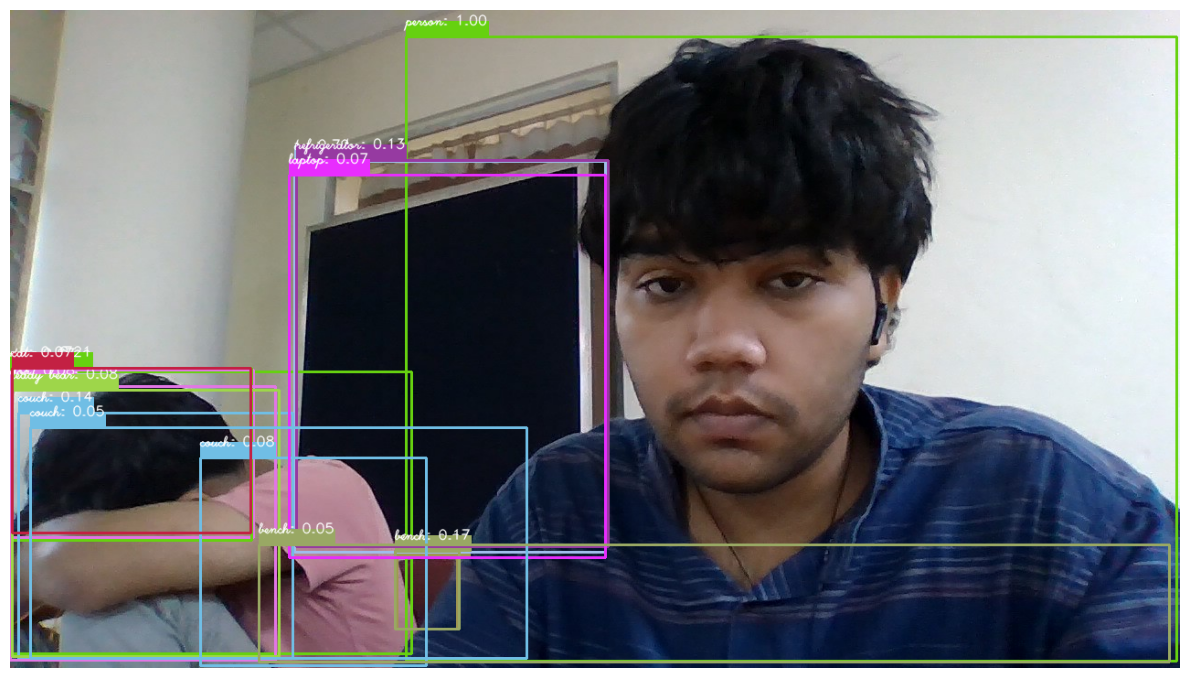

In [ ]:
image_path = "/content/WIN_20241112_15_47_53_Pro.jpg"
main(image_path)

###for VS-CODE

In [ ]:
import cv2
import torch
import torchvision.transforms.functional as F
cap = cv2.VideoCapture(0)
if not cap.isOpened():
  print("Error:could not open webcam")
else:
  while True:
    ret,frame = cap.read()
    if not ret:
      print("Error: Could not read frame")
      break
    main1(frame)
    if cv2.waitkey(1) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()

Error:could not open webcam


####for google colab

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

In [ ]:
def capture_frame_from_webcam():
    js = Javascript('''
        async function capture() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        ''')
    display(js)
    data = eval_js('capture()', timeout_sec=20)
    binary = b64decode(data.split(',')[1])
    nparr = np.frombuffer(binary, np.uint8)
    frame1 = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return frame1

<IPython.core.display.Javascript object>

Model loaded with 91 categories
model Output
[{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([])}]
detected0


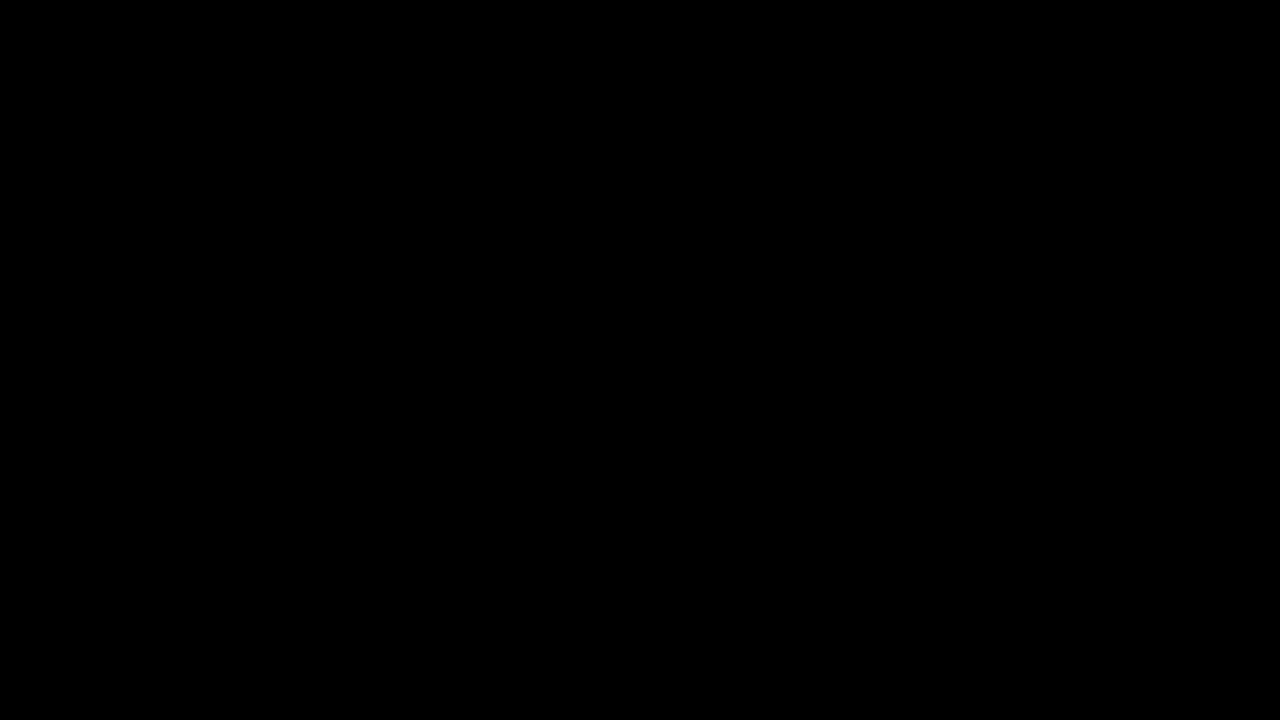

In [ ]:
frame1 = capture_frame_from_webcam()
if frame1 is not None:
  main_colab(frame1)
else:
  print("no camera found")

In [ ]:
|import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import functional as F

# Colab-specific imports for webcam access
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

# 1. Webcam Capture Function for Colab
# This JavaScript-based function captures a single frame from your webcam.
def capture_frame_from_webcam():
    js = Javascript('''
        async function capture() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        ''')
    display(js)
    try:
        data = eval_js('capture()', timeout_sec=20)
        binary = b64decode(data.split(',')[1])
        nparr = np.frombuffer(binary, np.uint8)
        frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        return frame
    except Exception as err:
        print(f"Error capturing frame: {err}")
        return None

# 2. Model and Helper Functions from your notebook
def load_model():
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    # Corrected the typo: 'threh' to 'thresh'
    model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.7)
    model.eval()
    return model, weights.meta["categories"]

def perform_detection(model, image_tensor):
    with torch.no_grad():
        prediction = model([image_tensor])
        print("model Output")
        print(prediction)
        return prediction[0]

def visualize_detection(image, predictions, category_names):
    # This function is largely correct, with a small adjustment for text position
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    boxes = predictions['boxes'].cpu().numpy().astype(np.int32)
    scores = predictions['scores'].cpu().numpy()
    labels = predictions['labels'].cpu().numpy()

    image_with_boxes = image_np.copy()
    color_map = {}

    for box, score, label in zip(boxes, scores, labels):
        if score > 0.7:  # Using the threshold for visualization
            if label not in color_map:
                color_map[label] = (
                    np.random.randint(0, 255),
                    np.random.randint(0, 255),
                    np.random.randint(0, 255)
                )
            color = color_map[label]

            cv2.rectangle(
                image_with_boxes,
                (box[0], box[1]),
                (box[2], box[3]),
                color,
                2
            )

            label_text = f"{category_names[label]}: {score:.2f}"
            text_size, baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(
                image_with_boxes,
                (box[0], box[1] - text_size[1] - 5),
                (box[0] + text_size[0], box[1]),
                color,
                -1
            )
            cv2.putText(
                image_with_boxes,
                label_text,
                (box[0], box[1] - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

    image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    return image_with_boxes

# 3. The Main Loop to simulate real-time video
def main_colab_loop():
    model, categories = load_model()
    print(f"Model loaded with {len(categories)} categories")

    while True:
        frame = capture_frame_from_webcam()
        if frame is not None:
            frame_tensor = F.to_tensor(frame)
            predictions = perform_detection(model, frame_tensor)
            num_detections = len(predictions['boxes'])
            print(f"detected{num_detections}")

            result_frame = visualize_detection(frame, predictions, categories)
            clear_output(wait=True)
            cv2_imshow(result_frame)
        else:
            print("No camera found or frame could not be captured. Stopping loop.")
            break

# 4. Run the main function
if __name__ == "__main__":
    main_colab_loop()

SyntaxError: invalid syntax (ipython-input-2719732002.py, line 1)

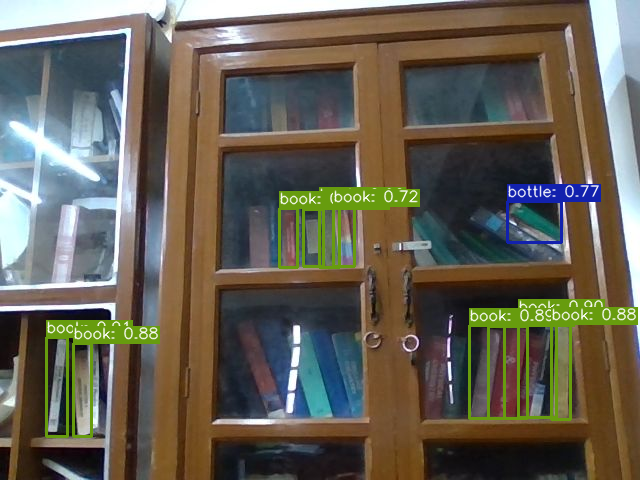

<IPython.core.display.Javascript object>

Error capturing frame: 'NoneType' object has no attribute 'split'
No camera found or frame could not be captured. Stopping loop.


In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import functional as F

# Colab-specific imports for webcam access
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode

# 1. Webcam Capture Function for Colab
# This JavaScript-based function captures a single frame from your webcam.
def capture_frame_from_webcam():
    js = Javascript('''
        async function capture() {
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        ''')
    display(js)
    try:
        data = eval_js('capture()', timeout_sec=20)
        binary = b64decode(data.split(',')[1])
        nparr = np.frombuffer(binary, np.uint8)
        frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        return frame
    except Exception as err:
        print(f"Error capturing frame: {err}")
        return None

# 2. Model and Helper Functions from your notebook
def load_model():
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    # Corrected the typo: 'threh' to 'thresh'
    model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.7)
    model.eval()
    return model, weights.meta["categories"]

def perform_detection(model, image_tensor):
    with torch.no_grad():
        prediction = model([image_tensor])
        print("model Output")
        print(prediction)
        return prediction[0]

def visualize_detection(image, predictions, category_names):
    # This function is largely correct, with a small adjustment for text position
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    boxes = predictions['boxes'].cpu().numpy().astype(np.int32)
    scores = predictions['scores'].cpu().numpy()
    labels = predictions['labels'].cpu().numpy()

    image_with_boxes = image_np.copy()
    color_map = {}

    for box, score, label in zip(boxes, scores, labels):
        if score > 0.7:  # Using the threshold for visualization
            if label not in color_map:
                color_map[label] = (
                    np.random.randint(0, 255),
                    np.random.randint(0, 255),
                    np.random.randint(0, 255)
                )
            color = color_map[label]

            cv2.rectangle(
                image_with_boxes,
                (box[0], box[1]),
                (box[2], box[3]),
                color,
                2
            )

            label_text = f"{category_names[label]}: {score:.2f}"
            text_size, baseline = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(
                image_with_boxes,
                (box[0], box[1] - text_size[1] - 5),
                (box[0] + text_size[0], box[1]),
                color,
                -1
            )
            cv2.putText(
                image_with_boxes,
                label_text,
                (box[0], box[1] - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (255, 255, 255),
                1,
                cv2.LINE_AA
            )

    image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
    return image_with_boxes

# 3. The Main Loop to simulate real-time video
def main_colab_loop():
    model, categories = load_model()
    print(f"Model loaded with {len(categories)} categories")

    while True:
        frame = capture_frame_from_webcam()
        if frame is not None:
            frame_tensor = F.to_tensor(frame)
            predictions = perform_detection(model, frame_tensor)
            num_detections = len(predictions['boxes'])
            print(f"detected{num_detections}")

            result_frame = visualize_detection(frame, predictions, categories)
            clear_output(wait=True)
            cv2_imshow(result_frame)
        else:
            print("No camera found or frame could not be captured. Stopping loop.")
            break

# 4. Run the main function
if __name__ == "__main__":
    main_colab_loop()